# Python for Data Science

## Step 0

This is a step where I import the modules that I'm going to be using, and define constants used in the subsequent code cells.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats

csv_path = 'gapminder_clean.csv' # the csv file path

ct_year = 'Year' # the column title representing the year
ct_co2 = 'CO2 emissions (metric tons per capita)' # the column title representing CO2 emissions
ct_gdppercap = 'gdpPercap' # the column title representing the GDP per capita


ct_pearson_r = 'Pearson R value (CO2 emissions <-> GDP per Capita)' # the column title representing the computed Pearson R value between CO2 emissions and the GDP per capita
ct_pearson_p = 'Pearson p value (CO2 emissions <-> GDP per Capita)' # the column title representing the computed Pearson R value between CO2 emissions and the GDP per capita

## Step 1

Reading in `gapminder_clean.csv`as a `pandas` `DataFrame`

In [2]:
data = pd.read_csv(csv_path)
data

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
1,1,Afghanistan,1967,NaN,0.123782,9.917662,NaN,NaN,6.772908,7.450,NaN,14.209827,NaN,NaN,35.389415,15.881812,NaN,11537966.0,Asia,836.197138
2,2,Afghanistan,1972,NaN,0.130820,18.880833,NaN,NaN,14.763231,7.450,NaN,18.105850,NaN,NaN,37.610146,17.947027,NaN,13079460.0,Asia,739.981106
3,3,Afghanistan,1977,NaN,0.183118,13.836822,NaN,NaN,11.662904,7.449,NaN,14.823175,NaN,NaN,40.110146,19.998926,NaN,14880372.0,Asia,786.113360
4,4,Afghanistan,1982,NaN,0.165879,NaN,NaN,NaN,NaN,7.450,NaN,NaN,NaN,NaN,43.230732,19.402324,NaN,12881816.0,Asia,978.011439
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,2602,Zimbabwe,1987,14.407528,1.598217,74.161607,878.072691,896.673611,24.015710,5.784,1.150737,21.274886,32.451242,7.189361,61.753805,24.649495,53.141236,9216418.0,Africa,706.157306
2603,2603,Zimbabwe,1992,7.413793,1.533724,43.120518,778.695133,923.493407,27.227263,4.840,-9.015570,36.485231,40.862069,-14.129659,56.491976,28.485762,51.724135,10704340.0,Africa,693.420786
2604,2604,Zimbabwe,1997,18.934082,1.194678,63.058320,870.988697,804.508892,37.595273,4.237,2.680594,44.609791,25.554678,-2.879048,46.065902,31.174507,55.511236,11404948.0,Africa,792.449960
2605,2605,Zimbabwe,2002,14.029007,0.942795,164.559047,827.329873,772.676619,31.834799,4.018,-8.894023,34.972553,NaN,2.712950,40.679146,32.807111,NaN,11926563.0,Africa,672.038623


## Step 2

Extracting records regarding the year 1962.

In [3]:
data_1962 = data[data[ct_year] == 1962]
data_1962

,Unnamed: 0,Country Name,Year,"Agriculture, value added (% of GDP)",CO2 emissions (metric tons per capita),Domestic credit provided by financial sector (% of GDP),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),Exports of goods and services (% of GDP),"Fertility rate, total (births per woman)",GDP growth (annual %),Imports of goods and services (% of GDP),"Industry, value added (% of GDP)","Inflation, GDP deflator (annual %)","Life expectancy at birth, total (years)",Population density (people per sq. km of land area),"Services, etc., value added (% of GDP)",pop,continent,gdpPercap
0,0,Afghanistan,1962,NaN,0.073781,21.276422,NaN,NaN,4.878051,7.450000,NaN,9.349593,NaN,NaN,33.219902,14.312061,NaN,10267083.0,Asia,853.100710
10,10,Albania,1962,NaN,1.439956,NaN,NaN,NaN,NaN,6.282000,NaN,NaN,NaN,NaN,64.162854,62.456898,NaN,1728137.0,Europe,2312.888958
20,20,Algeria,1962,NaN,0.484954,NaN,NaN,NaN,19.793873,7.614000,-19.685042,20.818647,NaN,2.351279,47.045000,4.908240,NaN,11000948.0,Africa,2550.816880
30,30,American Samoa,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.590000,NaN,NaN,NaN,NaN
40,40,Andorra,1962,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.714894,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,2553,Virgin Islands,1962,NaN,NaN,NaN,NaN,NaN,NaN,5.679000,NaN,NaN,NaN,NaN,64.462561,103.714286,NaN,NaN,NaN,NaN
2567,2567,World,1962,NaN,3.134694,75.777409,NaN,NaN,11.651114,5.030386,5.549853,11.916013,NaN,NaN,53.404890,24.120006,NaN,NaN,NaN,NaN
2577,2577,"Yemen, Rep.",1962,NaN,0.728004,NaN,NaN,NaN,NaN,7.437000,NaN,NaN,NaN,NaN,34.739561,10.112857,NaN,NaN,NaN,NaN
2587,2587,Zambia,1962,NaN,NaN,NaN,NaN,NaN,NaN,7.127000,-2.490840,NaN,NaN,2.091562,45.853659,4.359305,NaN,3421000.0,Africa,1452.725766


Drawing a simple scatter plot using CO2 emissions on the x axis, and the GDP per capita on the y axis, **with linear scales, and no modification to the labels**. This plot is not very very helpful because of that one outlier with CO2 emissions > 40 and GDP per capita > 80000. Upon simple investigation, it turns out to be `Kuwait`.

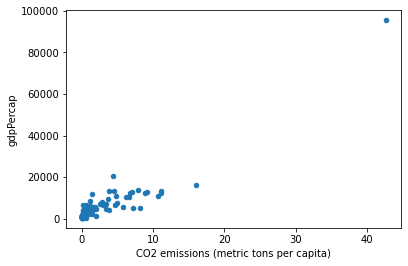

In [4]:
_ = data_1962.plot.scatter(x=ct_co2, y=ct_gdppercap)

Drawing a much more readable scatter plot by using a **a logarithmic scale and axis label modification**. The ticks are ugly and I don't know what to do about it except replacing them manually but that would be uglier.

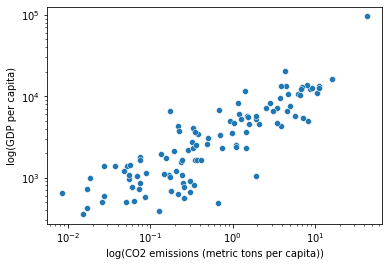

In [5]:
plt.clf()
sns.scatterplot(data=data_1962, x=ct_co2, y=ct_gdppercap)
plt.xlabel('log(CO2 emissions (metric tons per capita))')
plt.ylabel('log(GDP per capita)')
ax = plt.gca() 
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In both cases, there are a **lot of unplotted rows** because of all of these `NaN` values. They are missing values from the CSV and we can do nothing about it.

## Step 3

Cleaning the dataframe and keeping only rows that do not contain `NaN` values.

In [6]:
sub_df = data_1962[[ct_co2, ct_gdppercap]]
relevant_rows = sub_df.dropna(subset=[ct_co2, ct_gdppercap])
relevant_rows

,CO2 emissions (metric tons per capita),gdpPercap
0,0.073781,853.100710
10,1.439956,2312.888958
20,0.484954,2550.816880
50,0.216025,4269.276742
80,2.522392,7133.166023
...,...,...
2443,0.059258,767.271740
2473,11.142928,12477.177070
2483,16.013937,16173.145860
2503,1.540657,5603.357717


In [7]:
sub_df[ct_co2].notnull()

0        True
10       True
20       True
30      False
40      False
        ...  
2553    False
2567     True
2577     True
2587    False
2597    False
Name: CO2 emissions (metric tons per capita), Length: 259, dtype: bool

Isolating every feature in a different array.

In [8]:
co2_arr = relevant_rows[ct_co2].values
gdppercap_arr = relevant_rows[ct_gdppercap].values
co2_arr.shape == gdppercap_arr.shape

True

Calculating Pearson's r and the associated p-value using `scipy`.

In [9]:
scipy.stats.pearsonr(co2_arr, gdppercap_arr)

(0.9260816725019472, 1.1286792210038754e-46)

The Pearson R value is `0.9260816725019472` which indicates very strong positive correlation, and the very small associated p value, roughly `1.128e-46`, means that this is extremely statistically relevant. There is very little chance to get these results with the given entries when the null-hypothesis is correct.

## Step 4

In order to answer the question "In what year is the correlation between `CO2 emissions (metric tons per capita)` and `gdpPercap` the strongest?", I am going to execute the following steps:
1. Clean the dataframe, ridding it of any rows that contain `Nan` in either of the 3 columns we are dealing with
2. Extract the unique years in a separate data structure
3. Create a function that calculates the Pearson R value given a clean dataframe and a year
4. Apply said function to each year found among the unique years, and save the result
5. Find the max result, and with it the corresponding year

### Step 4.1

Extracting the 3 columns that are of interest in a separate dataframe excluding any rows that contain `NaN` in one of these columns.

In [10]:
step4_df = data[[ct_year, ct_co2, ct_gdppercap]].dropna(subset=[ct_year, ct_co2, ct_gdppercap])

In [11]:
step4_df

,Year,CO2 emissions (metric tons per capita),gdpPercap
0,1962,0.073781,853.100710
1,1967,0.123782,836.197138
2,1972,0.130820,739.981106
3,1977,0.183118,786.113360
4,1982,0.165879,978.011439
...,...,...,...
2602,1987,1.598217,706.157306
2603,1992,1.533724,693.420786
2604,1997,1.194678,792.449960
2605,2002,0.942795,672.038623


### Step 4.2

Getting the unique years in a separate data structure.

In [12]:
unique_years = step4_df[ct_year].unique()

In [13]:
unique_years_df = pd.DataFrame(data = unique_years.reshape((10,1)), columns=[ct_year])
unique_years_df

,Year
0,1962
1,1967
2,1972
3,1977
4,1982
5,1987
6,1992
7,1997
8,2002
9,2007


### Step 4.3

Creating a function that calculates the Pearson R value between CO2 emissions and the GDP per capita for a given year.

In [14]:
def do_the_deed(year, df):
    sub_df = df[df[ct_year]==year][[ct_co2, ct_gdppercap]]
    co2_arr = sub_df[ct_co2].values
    gdppercap_arr = sub_df[ct_gdppercap].values
    r, p = scipy.stats.pearsonr(co2_arr, gdppercap_arr)
    return np.array([r,p])
    

Testing with the results of the year 1962.

In [15]:
do_the_deed(1962,step4_df)

array([9.26081673e-01, 1.12867922e-46])

The result seems to fit the one computed in previous steps. This is consistent. We can move on.

### Step 4.4

Calculating the Pearson R value for every year and storing it in the dataframe.

In [16]:
result = unique_years_df.apply(lambda row : do_the_deed(row[ct_year], step4_df), axis=1)
result_df = pd.DataFrame(data=result.values.tolist(), columns=[ct_pearson_r, ct_pearson_p])
years_with_correlation = unique_years_df.join(result_df)

In [17]:
years_with_correlation

,Year,Pearson R value (CO2 emissions <-> GDP per Capita),Pearson p value (CO2 emissions <-> GDP per Capita)
0,1962,0.926082,1.128679e-46
1,1967,0.938792,3.397143e-53
2,1972,0.842899,1.824292e-32
3,1977,0.792834,2.838892e-26
4,1982,0.816638,5.565916e-29
5,1987,0.809553,3.899627e-28
6,1992,0.809432,1.610614e-29
7,1997,0.808140,7.976156e-30
8,2002,0.800642,3.863564e-29
9,2007,0.720417,9.232747e-22


### Step 4.5

Now to find the row with the max value of Pearson R.

In [18]:
max_ind = years_with_correlation.idxmax()[ct_pearson_r]
int(years_with_correlation.iloc[max_ind][ct_year])

1967

The year with maximum correlation is the year 1967, with an extremely low associated p value, so we can have a lot of trust in this correlation value.

## Step 5